<a href="https://colab.research.google.com/github/pillisrija/526-theta-day3/blob/main/Naive_Bayes_Classifier_with_Loan_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Preview:
   client_id loan_type  loan_amount  repaid  loan_id  loan_start    loan_end  \
0      46109      home        13672       0    10243  16-04-2002  20-12-2003   
1      46109    credit         9794       0    10984  21-10-2003  17-07-2005   
2      46109      home        12734       1    10990  01-02-2006  05-07-2007   
3      46109      cash        12518       1    10596  08-12-2010  05-05-2013   
4      46109    credit        14049       1    11415  07-07-2010  21-05-2012   

   rate  
0  2.15  
1  1.25  
2  0.68  
3  1.24  
4  3.13  

Missing Values:
client_id      0
loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64

Missing Values in X: 0
Missing Values in y: 0

Model Evaluation:
Accuracy: 0.48

Confusion Matrix:
[[13 17]
 [29 30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.43      0.36        30
           1       0.64 

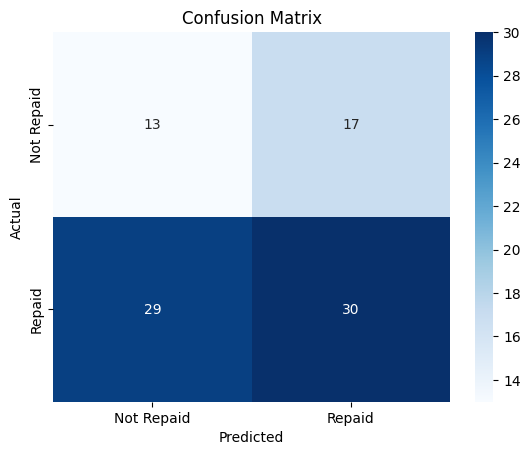

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
file_path = '/content/loans.csv'
data = pd.read_csv(file_path)
print("Dataset Preview:")
print(data.head())
print("\nMissing Values:")
print(data.isnull().sum())
data = data.dropna()
data = pd.get_dummies(data, columns=['loan_type'], drop_first=True)
X = data.drop(columns=['repaid', 'loan_id', 'loan_start', 'loan_end'])
y = data['repaid']
print(f"\nMissing Values in X: {X.isnull().sum().sum()}")
print(f"Missing Values in y: {y.isnull().sum()}")
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Repaid', 'Repaid'], yticklabels=['Not Repaid', 'Repaid'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
